## Analysis of Startups and Investors

#### Team 12 : Sai Chowdary Gullapally, Yimeng Wang

### __Introduction__:
Recent years have seen an upsurge in the number of startups established. While many of the startups are thirsty for funding on one hand, on the other hand venture capitalists are keenly judging and weighing their options  so that they can extract as much profit as they can through the investment. So in this project we would like to analyze patterns that prove beneficial to both startups and investors. __More particularly we would like to answer a few questions that an entrepreneur would ask himself when he is about to start a company, for example is there any particular time of the __.

### __Data set__:  
We use the data from the following https://github.com/notpeter/crunchbase-data <br>
We use the __'companies.csv'__ and __'investments.csv'__ files from the repository, they contain data of startups ans investments, we then do data pre-processing as explained below and then use it for our analysis

__Data Desription__:The following is a brief description of the dataset, we will explain each variable in better detail as and when we use it.

- __companies.csv__: This file has tabular form. It has 66368 rows, each row corresponds to a particular startup and has the following 14  columns/features:
    - __permalink__          :permalink of the company
    - __name__: Name of the company 
    - __homepageurl__: Hyperlink of the company’s website 
    - __category_list__: The list of categories like software biotechnology etc in which the company is performing its business
    - __funding_total_usd__: Total funding received by the company from inception in USD
    - __status__: Is the company still operating or not, 4 distinct categories(explained later)
    - __country_code__: Code of the country where the startup is located
    - __state_code__: Code of the state where the startup is located
    - __region__: Name of the region where the startup is located
    - __city__: Name of the city where the startup is located
    - __funding_rounds__: Number of funding rounds obtained
    - __founded_at__: Founding date of the company
    - __first_funding_at__: The date in string format (YYYY-MM-DD) it received its first funding
    - __last_funding_at__: The date in string format (YYYY-MM-DD) it received its latest funding

- __investments.csv__: This is also Tabular with 168647 rows and each row has 18 columns/features corresponding to an investment.The columns are:
    - __company_permalink__ :permalink of the company
    - __company_name__ : Name of the company 
    - __company_category_list__ :The list of categories like software biotechnology etc in which the company is performing its business
    - __company_country_code__: Code of the country where the startup is located
    - __company_state_code__ :Code of the state where the startup is located
    - __company_region__ :Region where the startup is located
    - __company_city__ :Name of the city where the startup is located
    - __investor_permalink__ :permalink of the investor
    - __investor_name__ :Name of the investor
    - __investor_country_code__ :Code of the country where the investor is located
    - __investor_state_code__:Code of the state where the investor is located
    - __investor_region__ :Region where the investor is located
    - __investor_city__ :Name of the city where the investor is located
    - __funding_round_permalink__ : permalink of funding round
    - __funding_round_type__: Type of funding round (seed,venture etc)
    - __funding_round_code__ :Code of the round (if the type is venture then we can have A,B,C etc)
    - __funded_at__      : Date in string format (YYYY-MM-DD)of the funding
    - __raised_amt_usd__: Amount of funding in USD

### Pre-processing:

__1.Removing Null entries__: This is done individually as per each of the sub task we focus on,even though it would be lot simpler to just remove them at the beginning we felt it is better to remove specifically/separately for each task as and when needed because if we remove at the beginnig at self then we might loose a lot more data for example if a particular row has values in all the columns required for a specific task but has Null values in other columns we can still use this row for that sub task but if we remove all the null values at beginning then this data would have been lost, hence we stuck to this preprocesing as and when needed, we point it out clearly whenever we do preprocessing.

__2.Removing erroneous data__: this proved to be the toughest as erroneous data could be quite inconspicuous at the first glance, we were led off the track at a few places due to this. For example many startups which did not have a start date but had a start year were assigned probably assigned start date of 01/01/year and when we used this data from github directly it led us astray. We clean the data as and when necessary and clearly point it out when needed.  

__2.Formatting__:A major portion of preprocessing is converting the dates from strings to datetime objects and further creating columns for year,momth and day as these are very useful in analysis that we perform like for example seeing the difference in months between the founding of the company and the day it receives its first funding etc. Similar things apply for investments data as well.

__3.Year wise analysis__:Soetimes while looking at the trends it is better to look at just one year rather than include many years together so that the data is more relevant to the present and the trends we observe can be made use of! So, in many cases like when slooking at data like proportions we choose to analyze the startups founded in year '2014' simply because it was the most recent year with full information. Of course this is not always the optimal and we have changed the subset of data to be analyzed as and when needed.

__4. Merging data from both files__:

### Analysis:

### Importing the necessary libraries:

In [146]:
from __future__ import division, print_function# to make the code compatible with python 2.x,3.x
import pandas as pd #for operating with dataframes
import numpy as np #for operating with numpy arrays
from datetime import datetime,date #for converting dates from string to datetime objects
from cycler import cycler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly # for using plotly in jupyter notebook and plotting
from matplotlib import pyplot as plt# for plotting
import random 
import pylab as pl
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import rcParams

%matplotlib inline 
#for plotting within jupyter notebook

In [48]:
#total number of startups
#min year max year
#total number of investors
#total number of investments
#what variables do we have
#

### Reading the data

In [49]:
try:
    companies=pd.read_csv('ece143/project/companies.csv')
except FileNotFoundError :
    print('The path specified doesnot exist')
companies.head(2)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14


In [219]:
try:
    investments=pd.read_csv('ece143/project/investments.csv')
except FileNotFoundError :
    print('The path specified doesnot exist')
investments.head(2)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN


### Pre-processing: (Not the entire pre-processing but only a part of it) 
A major portion of preprocessing is converting the dates from strings to datetime objects and further creating columns for year,momth and day as these are very useful in analysis that we perform like for example seeing the difference in months between the founding of the company and the day it receives its first funding etc. Similar things apply for investments data as well. We also remove null values.

In [51]:
#remvoing null values
companies=companies[(pd.notnull(companies['first_funding_at']))&(pd.notnull(companies['founded_at']))]
#adding a column with respective date-time objects
companies['founded_at']=companies['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
companies['first_funding_at']=companies['first_funding_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
#adding columns for day,month,year,date etc
companies['founded_at_date']=companies['founded_at'].apply(lambda x:x.date())
companies['first_funding_at_date']=companies['first_funding_at'].apply(lambda x:x.date())
companies['founding_year']=companies['founded_at'].apply(lambda x:x.year)
companies['founding_month']=companies['founded_at'].apply(lambda x:x.month)
companies['founding_day']=companies['founded_at'].apply(lambda x:x.day)
#adding column for difference between starting date and first funding date
companies['difference']=companies['first_funding_at_date']-companies['founded_at_date']
companies['difference']=companies['difference'].apply(lambda x:x.days/30)

In [220]:
#removing null values
investments=investments[pd.notnull(investments['funded_at'])]
#adding a column with respective date-time objects
investments['funded_at']=investments['funded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
#adding columns for day,month,year,date etc
investments['funded_at_date']=investments['funded_at'].apply(lambda x:x.date())
investments['funding_year']=investments['funded_at'].apply(lambda x:x.year)
investments['funding_month']=investments['funded_at'].apply(lambda x:x.month)
investments['funding_day']=investments['funded_at'].apply(lambda x:x.day)
investments['raised_amount_usd_millions']=investments['raised_amount_usd'].apply(lambda x:x/1000000.0)

### Helper functions:

Helper for plotting pie charts:

In [53]:
#put docstrings

In [54]:
def get_pie_data(s,df):
    #assert isinstance(s,basestring)
    assert isinstance(df, pd.core.frame.DataFrame)
    
    df = df[pd.notnull(df[s])]
    label = list(df[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(df[s]).count(item))
    
    pair = list(zip(label,frequency))
    pair.sort(key=lambda x:x[1], reverse=True)

    count=0
    i = len(pair)-1
    while(i>5):
        count = count + pair[i][1]
        del(pair[i])
        i-=1
    
    pair.append(('Other',count))
    
    return(pair)

# Draw pie chart for the country data using pyplot.pie for 2014
def plot_pie_chart(labels,sizes,plot_title):
        def autopct_generator(limit):
            """Remove percent on small slices."""
            def inner_autopct(pct):
                return ('%.2f%%' % pct) if pct > limit else ''
            return inner_autopct

        total = sum(sizes)
        label_cond=[]
        for i in range(len(labels)):
            if sizes[i]>0.04*total:
                label_cond.append(labels[i])
            else:
                label_cond.append('')           
        fig,ax = plt.subplots(figsize=(8, 6))
        theme = plt.get_cmap('Set2')
        ax.set_prop_cycle( cycler('color',[theme(1.*i/len(pair)) for i in range(len(pair))]))
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 1, box.height])
        _, _, autotexts = ax.pie(sizes, labels=label_cond, labeldistance=0.8, 
                                 autopct=autopct_generator(4), startangle=90, radius=1.8 * 1000)
        for autotext in autotexts:
            autotext.set_size('large')
        ax.axis('equal')
        plt.legend(
            loc='upper left',
            labels=['%s, %1.1f%%' % (
                l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
            prop={'size': 12},
            bbox_to_anchor=(0.95, 1),
            bbox_transform=fig.transFigure
        )
        plt.suptitle(plot_title)
        plt.show()

### Numer of startups : Countrywise 

Whenver someone wants to start a company they would definitely be interested in knowing the global trends and see which places are hitspots for startups, so we first begin with country wise proportion of the number of startups, we choose the startups founded in the year 2014(reasns explained in the preprocessing section) for this, we can seee the result below in a pie chart:

NOTE: This is the analysis of startups __founded__ in 2014 and not total number of existing in 2014!

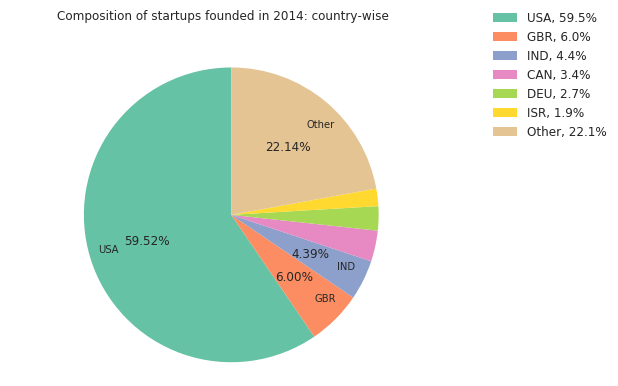

Number of unique countries=  84
Number of companies started in 2014=  4960


In [55]:
pair = get_pie_data('country_code',companies[companies['founding_year']==2014])
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Composition of startups founded in 2014: country-wise')
print('Number of unique countries= ',len(companies[companies['founding_year']==2014]['country_code'].unique()))
print('Number of companies started in 2014= ',companies[companies['founding_year']==2014].shape[0])

As we can see __USA has the major share at almost 60%__ of the proportion of the number of startups founded in 2014, __also note the huge difference between USA and the second country Britain(6%)__ we actually checked this for multiple years and this trend is similar(although the top2-top5 countries fluctuate). Also in order for the visualization to make better sense and be more readable we have grouped all the countries other than top 6 in to the category 'Other'. This __clearly shows that USA is one of the hotspots for startups and it is a good idea to choose USA as the country to put your company if a choice is available.__

### Investments: 
There are two kinds of analysis we can do for investments
  - __'Number'__ of investments i.e look at just the number ignoring the 'amount' of each individual  investment
  - __'Amount'__ of total money invested i.e look at the amount of money invested instead of counting the number of investments 
  
#### Note: In case of investments we can have two possible countries i.e country where the company is located and the country where the investor is located. When we say country we mean the company's country by default unless mentioned otherwise.

### Number of Investments : country wise

Whenver someone wants to start a company with regard to choosing location etc they would definitely be interested in knowing the global trends and see which places are hotspots for investments, so we analyze country wise proportion of the number of investments, we choose the investments in the year 2014 (so that it stays relevant to the present) for this, we can seee the result below in a pie chart:

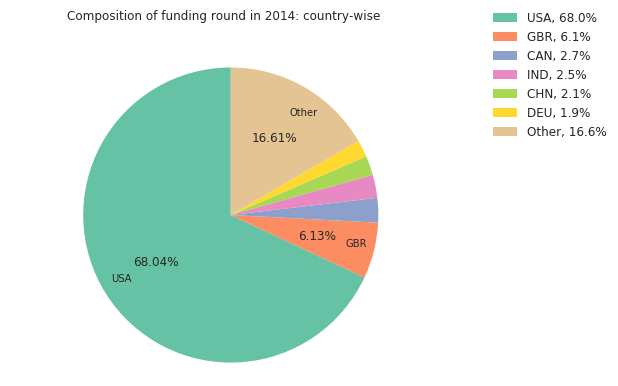

Number of total investments in 2014=  28340
Number of unique countries from which there were investments=  79
Number of unique countries which received investments=  93


In [56]:
pair=get_pie_data('company_country_code',investments[investments['funding_year']==2014])
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Composition of funding round in 2014: country-wise')
print('Number of total investments in 2014= ',investments[investments['funding_year']==2014].shape[0])
print('Number of unique countries from which there were investments= ',len(investments[investments['funding_year']==2014]['investor_country_code'].unique()))
print('Number of unique countries which received investments= ',len(investments[investments['funding_year']==2014]['company_country_code'].unique()))

As we can see clearly __USA overwhelmingly dominates__ other countries in this scenario too __with around 68%__ of the funding investments of the entire world happening in the USA itself, __also note the huge difference between USA and the second country Britain(around 6%)__ we again checked this for multiple years and this trend is similar(although the top2-top5 countries fluctuate a bit). Also in order for the visualization to make better sense and be more readable we have grouped all the countries other than top 6 in to the category 'Other'. This shows that __clearly USA is one of the hotspots for investment activity 'in terms of number of investments' and it is a good idea to choose USA as the country to put your company if a choice is available.__

### Amount of investments: country wise

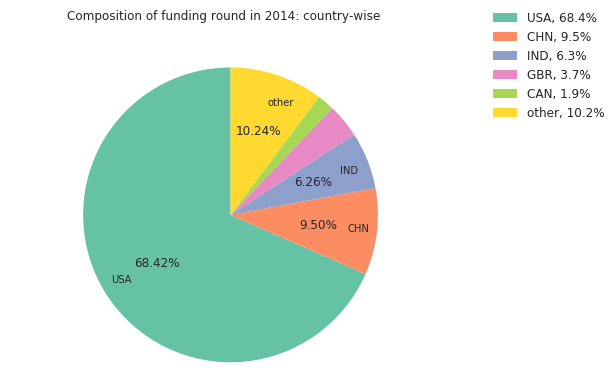

Amount of total investments in 2014 in USD=  378770975845.23193 USD
Number of unique countries from which there were investments=  79
Number of unique countries which received investments=  93


In [57]:
investments_14=investments[(pd.notnull(investments['raised_amount_usd'])) & (investments['funding_year']==2014)]
country_investment=investments_14[['raised_amount_usd','company_country_code']].groupby('company_country_code').agg('sum')
countries=list(country_investment.index)
investment=country_investment['raised_amount_usd'].tolist()
ci_tuple=list(zip(countries,investment))
ci_tuple.sort(key= lambda x:x[1],reverse=True)
c,i=zip(*ci_tuple)
c=list(c)
i=list(i)
other_i=sum(i[5:])
c=c[:5]+['other']
i=i[:5]+[other_i]
plot_pie_chart(c,i,'Composition of funding round in 2014: country-wise')
print('Amount of total investments in 2014 in USD= ',investments[investments['funding_year']==2014]['raised_amount_usd'].sum(),'USD')
print('Number of unique countries from which there were investments= ',len(investments[investments['funding_year']==2014]['investor_country_code'].unique()))
print('Number of unique countries which received investments= ',len(investments[investments['funding_year']==2014]['company_country_code'].unique()))

As we can see there is __not much of a change in USA from the previous pie chart above this BUT there is a change in China and also the category 'other'__ Clearly this shows that it is important to analyze both the amount and number of fundings. It seems that while britain has more number of investements than China but they are smaller investements and though __China has fewer investemnts but the average amount of money invested per invested is much higher in China than compared to Britain__. Similarly in the case of 'other' though there seem to be around 17% of the total investments they add up only to 10% of the total amount of money invested across the world hence this shows that the average __amount per investments is small in 'other' category__.  As we can see clearly __USA overwhelmingly dominates__ other countries in this scenario too __with around 68%__ of the funding amount of the entire world being invested in the USA itself, __also note the huge difference between USA and the second country China(around 6%)__.   we again checked this for multiple years and this trend is similar(although the top2-top5 countries fluctuate a bit). Also in order for the visualization to make better sense and be more readable we have grouped all the countries other than top 6 in to the category 'Other'. This shows that __clearly USA is one of the hotspots for investment activity 'in terms of number of investments' and it is a good idea to choose USA as the country to put your company if a choice is available.__

### Status of the startups in USA (i.e  are they successful or not?)

As USA seems to be a good place to begin looking into, the next question of interest would be to see how the startups in USA are faring i.e. what is their status. This can be easily seen with the 'status' column in the dataframe which makes note of the status of the startup as either 'operating','acquired','closed' or 'ipo'. For this we consider startups founded between 2005 to 2010 (inclusive) we do so because if we take the startups founded in 2014 they would all be runnig just because they were recently started and neet not be because they are actually successful and stood the test of time, so we choose only startups founded before 2010 as that menas they stood the test of time for atleast 5 years, also we do not go beyond 2005 just to keep the data relevant to the present. 

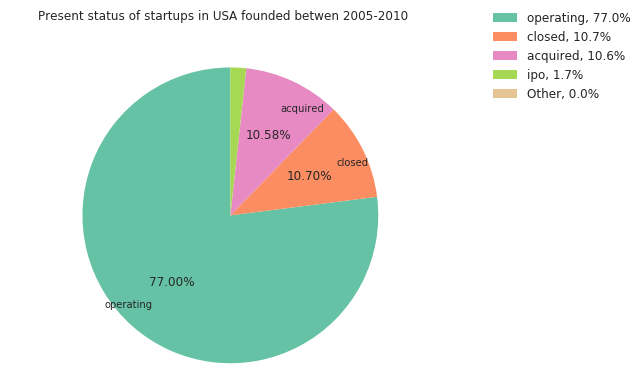

Number of companies started between 2005-2010=  16255
The various status are  ['operating' 'acquired' 'closed' 'ipo']


In [58]:
pair = get_pie_data('status',companies[(companies['founding_year']<2011)&(companies['founding_year']>2004)])
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Present status of startups in USA founded betwen 2005-2010')
print('Number of companies started between 2005-2010= ',companies[(companies['founding_year']<2011)&(companies['founding_year']>2004)].shape[0])
print('The various status are ',companies['status'].unique())

Thus we can see that surprisingly only a few of them have been closed(around 11%), being acquired cannot be declared clearly as being good or bad as it can be either way depenidng on the individual case so we left the categories as such and did not combine them. It is a great sign to see that most of them i.e. __around 77% are operational, so it is not a bad scenario at all for the startups in USA__

### Trend for the number of startups(worldwide) across each year

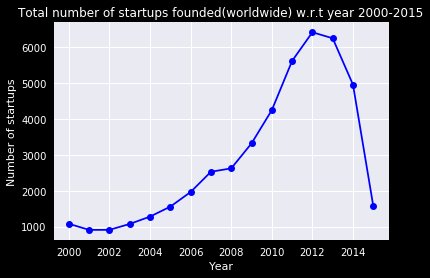

In [59]:
def get_year_wise_plot(df,years=None, countries=True):
    count_list=[]
    if years==None:
        years=range(int(df['founding_year'].min()),int(df['founding_year'].max()))
    #print(years)
   
    for year in years:
            count_list.append(df[df['founding_year']==year].shape[0])
    sns.set()
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)
    fig.patch.set_facecolor('xkcd:black')
    plt.plot(years,count_list, marker='o', color='b')
    plt.xlabel('Year',color='white')
    plt.ylabel('Number of startups',color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.title('Total number of startups founded(worldwide) w.r.t year '+str(min(years))+'-'+str(max(years)),color='white')
    plt.show()
    
get_year_wise_plot(companies,range(2000,2016))

The above is a plot for the number of startups founded yearwise worldwide from 2000-2010, we expected it to keep increasig but as we can see there is a fall in the number of startups after 2012, curious about this unexpected trend we went and searched online and found that the total number of startups being started is actually decreasing. We have provided the following article that discusses this: 
link:http://money.cnn.com/2016/09/08/news/economy/us-startups-near-40-year-low/index.html
In brief __"Walmartization(chains of big companies as opposed to "mom and pops" shops)", "Regulation","Big Companies acting more entrepreneurial"__ are the main reasons of the decline of new startups being set up as per the article.
![Image 1](ece143/project/decline.png)


__ Also due to the overwhelming dominance of USA it is possible that it can skew the results so we need to check for other countries as well__.Next we see the trends countrywise for the top 5 countries as per out analysis above i.e we look at the countries:['USA','GBR','IND','CAN','DEU'] i.e __USA,Britain,India,Canada,Germany__. We do this so that we can check if this trend s all over the o=world or only in the major contributor i.e. the U.S.

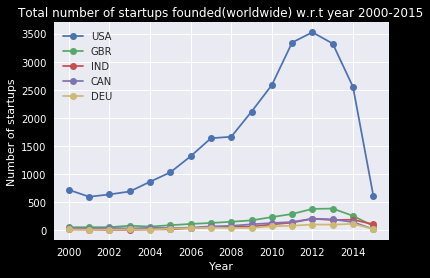

In [60]:
def get_top_country_plot(df, countries,years=range(2000,2016)):
    count_list=[[] for i in range(len(countries))]
    for i in range(len(countries)):
        for year in years:
            count_list[i].append(df[(df['founding_year']==year)&(df['country_code']==countries[i])].shape[0])
    fig, ax = plt.subplots()
    for i in range(len(countries)):
        ax.plot(range(2000,2016), count_list[i], label=countries[i],marker='o')
    leg = ax.legend()
    sns.set()
    fig.patch.set_facecolor('xkcd:black')
    plt.xlabel('Year',color='white')
    plt.ylabel('Number of startups',color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.title('Total number of startups founded(worldwide) w.r.t year '+str(min(years))+'-'+str(max(years)),color='white')
    plt.show()
    

countries=['USA','GBR','IND','CAN','DEU']
get_top_country_plot(companies,countries)

__Due to the dominance of U.S.A the graphs for the other countries are not clearly visible hence we remove U.S.A from countries list and plot the graph__ for the remaining countries as follows, we can see clearly that the trend is similar for all of the countries i.e they fall off after 2012.

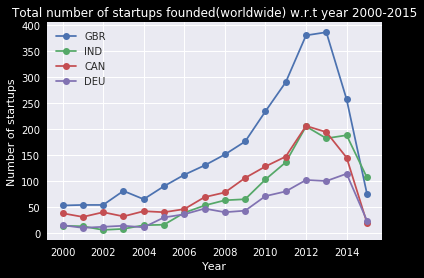

In [61]:
get_top_country_plot(companies,countries[1:])

### Investments:
Intrigued by this phenomenon we then analyzed the trends for investments(world wide) with repect to years, again we analyze both the number of investments and also the amount of investments, the results can be seen below:

### Trend for number of investments(worldwide)

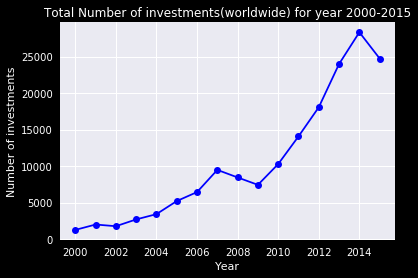

In [62]:
def get_year_wise_investments_plot(df,years=range(2000,2016),amount=False):
    count_list=[]
    if not amount:
        for year in years:
                count_list.append(df[df['funding_year']==year].shape[0])
    else:
        for year in years:
            count_list.append(df[df['funding_year']==year]['raised_amount_usd_millions'].sum())
    sns.set()
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)
    fig.patch.set_facecolor('xkcd:black')
    plt.plot(years,count_list, marker='o', color='b')
    plt.xlabel('Year',color='white')
    if not amount:
        plt.ylabel('Number of investments',color='white')
    else:
        plt.ylabel('Amount of investments in USD',color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    if not amount:
        plt.title('Total Number of investments(worldwide) for year '+str(min(years))+'-'+str(max(years)),color='white')
    else:
        plt.title('Total amount of investments(worldwide) for year in USD '+str(min(years))+'-'+str(max(years)),color='white')
    plt.show() 
get_year_wise_investments_plot(investments,range(2000,2016))

### Trend for amount of investments (worldwide)

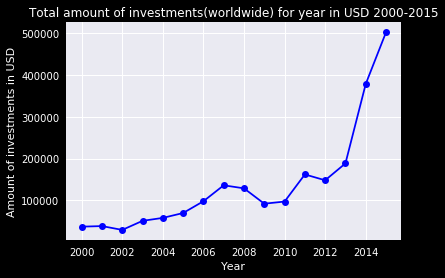

In [63]:
get_year_wise_investments_plot(investments,range(2000,2016),amount=True)

From the above two plots __we can see that the total number of investments has a fall from 2014 to 2015__ but it can be seen in the second plot that __importantly the total amount of investment has actually increased continuously__, it is possible that the __decline in number of investments__ could just be __due to the decline in number of startups__ itself, thus it looks as of there is no problem from the side of Investments currently which is a good thing for startups! <br>
__ Also due to the overwhelming dominance of USA it is possible that it can skew the results so we need to check for other countries as well__.
Next we see the trends countrywise for the top 5 countries as per out analysis above i.e we look at the countries: ['USA','GBR','IND','CAN','DEU'] i.e USA,Britain,India,Canada,Germany. We do this so that we can check if this trend is all over the world or only in the major contributor i.e. the U.S.

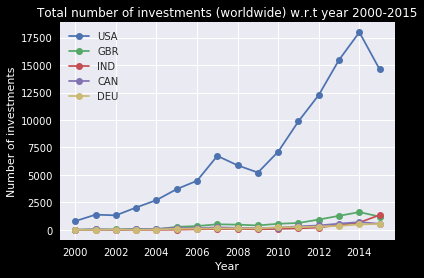

In [64]:
def get_top_country_plot(df, countries,years=range(2000,2016),amount=False):
    count_list=[[] for i in range(len(countries))]
    for i in range(len(countries)):
        if not amount:
            for year in years:
                count_list[i].append(df[(df['funding_year']==year)&(df['company_country_code']==countries[i])].shape[0])
        else:
            for year in years:
                count_list[i].append(df[(df['funding_year']==year)&(df['company_country_code']==countries[i])]['raised_amount_usd'].sum())

            
    fig, ax = plt.subplots()
    for i in range(len(countries)):
        ax.plot(range(2000,2016), count_list[i], label=countries[i],marker='o')
    leg = ax.legend()
    sns.set()
    fig.patch.set_facecolor('xkcd:black')
    plt.xlabel('Year',color='white')
    if not amount:
        plt.ylabel('Number of investments',color='white')
    else:
         plt.ylabel('Amount of investments in USD',color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    if not amount:
        plt.title('Total number of investments (worldwide) w.r.t year '+str(min(years))+'-'+str(max(years)),color='white')
    else:
        plt.title('Total amount of investment in USD(worldwide) w.r.t year '+str(min(years))+'-'+str(max(years)),color='white')

    plt.show()
    

countries=['USA','GBR','IND','CAN','DEU']
get_top_country_plot(investments,countries)

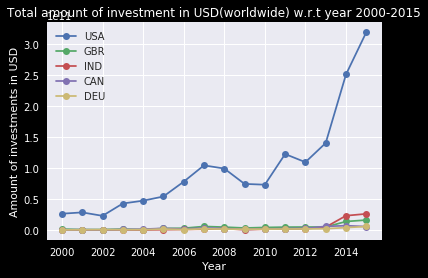

In [65]:
get_top_country_plot(investments,countries,amount=True)

__Due to the dominance of U.S.A the graphs for the other countries are not clearly visible hence we remove U.S.A from countries list and plot the graph__ for the remaining countries as follows, we can see clearly that the trend is similar for all of the countries i.e they fall off after 2012.

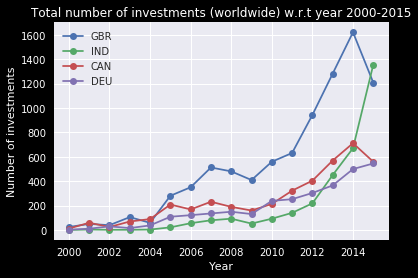

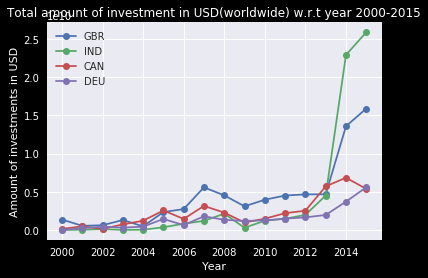

In [66]:
get_top_country_plot(investments,countries[1:])
get_top_country_plot(investments,countries[1:],amount=True)

These plots show some interesting insights in terms of the number of investments and the amount of investments there is stark contrast between Inda and the other countries shown above while most of the other countries see a decline or a small increase, __INDIA sees a huge improvement__ in both number and amount of investments, so we __can conclude from this analysis that INDIA is rapidly moving forward in the startup race__. After India Germany looks good. __Now let us look at the major investors in the world:__

### Top 6 investors in the world(ranked by total investment in all the years for which we have the data)

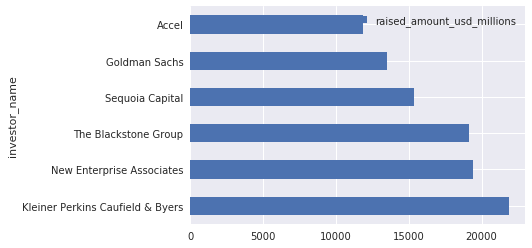

In [87]:
investments[investments['company_country_code']=='USA'][['investor_name','raised_amount_usd_millions']].groupby('investor_name').agg('sum').sort_values('raised_amount_usd_millions',ascending=False).iloc[:6,:].plot.barh()

### Top 6 investors in the world for the year 2014

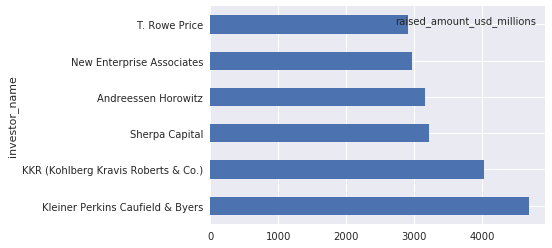

In [89]:
investments[(investments['company_country_code']=='USA') &(investments['funding_year']==2014)][['investor_name','raised_amount_usd_millions']].groupby('investor_name').agg('sum').sort_values('raised_amount_usd_millions',ascending=False).iloc[:6,:].plot.barh()

#### Now that we have seen the trends for different countries and have also seen th emajor share of USA in this domain we decided to focus our attention on the data about startups and investments in USA 

### Investment patterns in USA

We can look at investment patterns in a number of ways first we begin our analysis by taking a look at __Foreign and Local investments__. Foreign investments are those investments where the investor is not based in U.S.A and local are those for which the investor is based in U.S.A, for both the cases the compnay is in U.S.A


### Proportion of Investments in USA coming from within USA vs Outside

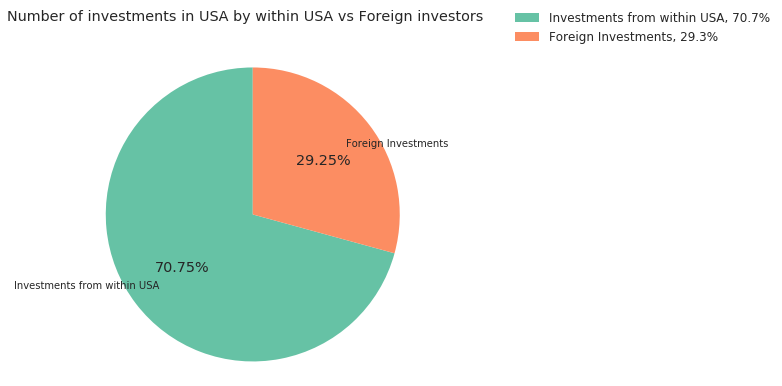

In [83]:
american_investments=investments[(investments['company_country_code']=='USA')&(investments['funding_year']==2014)]
#check the proportion of them investing inside vs outside
usa_investments=american_investments[american_investments['investor_country_code']=='USA'].shape[0]
outside_investments=american_investments[american_investments['investor_country_code']!='USA'].shape[0]
usa_investments*100.0/(outside_investments+usa_investments)
l=['Investments from within USA','Foreign Investments']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
plot_pie_chart(l,inv,'Number of investments in USA by within USA vs Foreign investors')

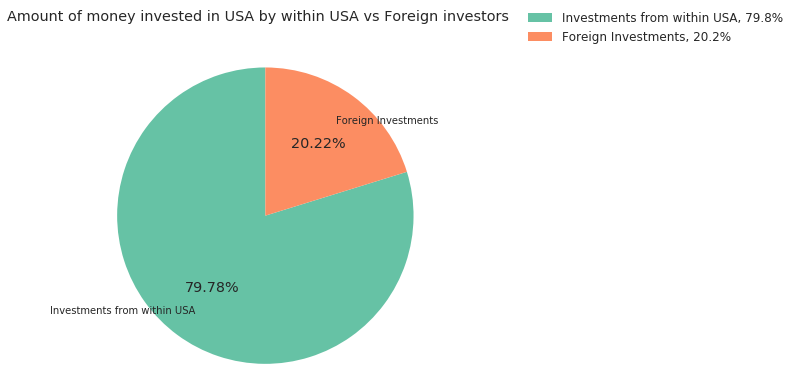

In [68]:
american_investments=investments[(investments['company_country_code']=='USA')&(investments['funding_year']==2014)]
#check the proportion of them investing inside vs outside
usa_investments=american_investments[american_investments['investor_country_code']=='USA']['raised_amount_usd'].sum()
outside_investments=american_investments[american_investments['investor_country_code']!='USA']['raised_amount_usd'].sum()
usa_investments*100.0/(outside_investments+usa_investments)
l=['Investments from within USA','Foreign Investments']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
plot_pie_chart(l,inv,'Amount of money invested in USA by within USA vs Foreign investors')

### Proportion of investors in USA investing within vs outside USA

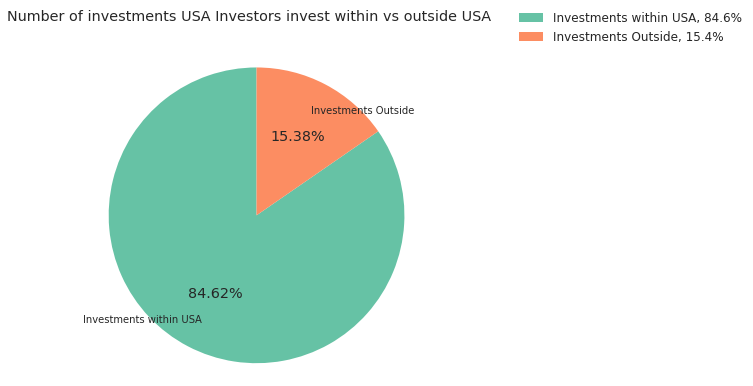

In [80]:
american_investors=investments[(investments['investor_country_code']=='USA')&(investments['funding_year']==2014)]
#check the proportion of them investing in america
usa_investments=american_investors[american_investors['company_country_code']=='USA'].shape[0]
outside_investments=american_investors[american_investors['company_country_code']!='USA'].shape[0]
l=['Investments within USA','Investments Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
plot_pie_chart(l,inv,'Number of investments USA Investors invest within vs outside USA')

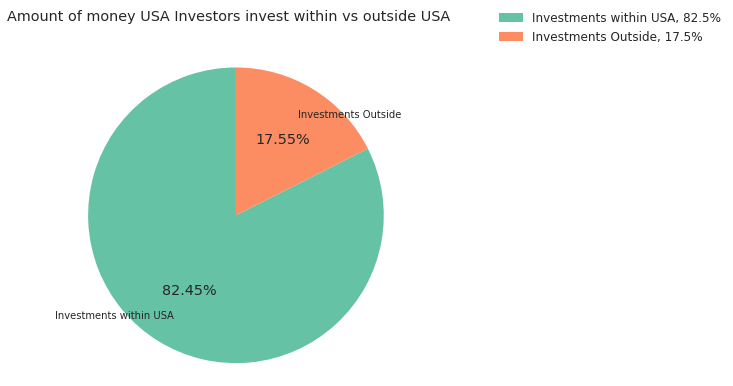

In [70]:
american_investors=investments[(investments['investor_country_code']=='USA')&(investments['funding_year']==2014)]
#check the proportion of them investing in america
usa_investments=american_investors[american_investors['company_country_code']=='USA']['raised_amount_usd'].sum()
outside_investments=american_investors[american_investors['company_country_code']!='USA']['raised_amount_usd'].sum()
l=['Investments within USA','Investments Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
plot_pie_chart(l,inv,'Amount of money USA Investors invest within vs outside USA')

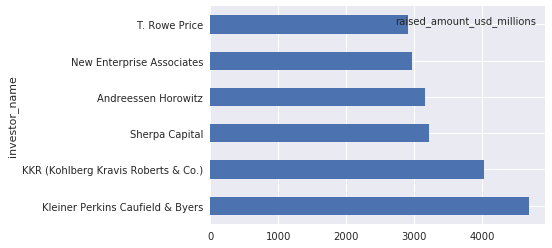

In [81]:
american_investors[american_investors['company_country_code']=='USA'][['investor_name','raised_amount_usd_millions']].groupby('investor_name').agg('sum').sort_values('raised_amount_usd_millions',ascending=False).iloc[:6,:].plot.barh()

Horizontal bar graph of Leading American investors investing in USA

### Proportion of investments of Foreign investors  within vs outside USA

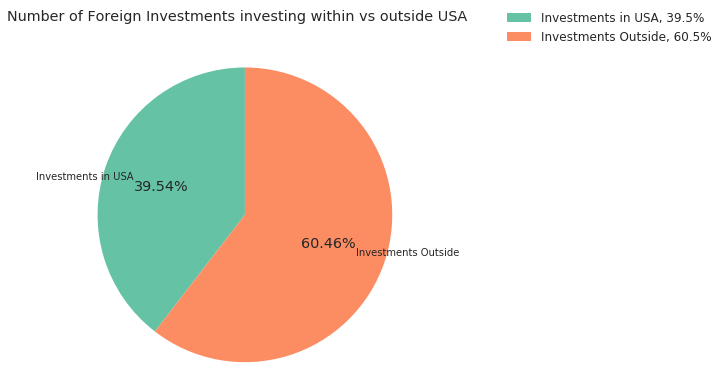

In [71]:
nonamerican_investors=investments[(~(investments['investor_country_code']=='USA'))&(investments['funding_year']==2014)]
#check the proportion of them investing in america
usa_investments=nonamerican_investors[nonamerican_investors['company_country_code']=='USA'].shape[0]
outside_investments=nonamerican_investors[nonamerican_investors['company_country_code']!='USA'].shape[0]
usa_investments*100.0/(outside_investments+usa_investments)
l=['Investments in USA','Investments Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
plot_pie_chart(l,inv,'Number of Foreign Investments investing within vs outside USA')

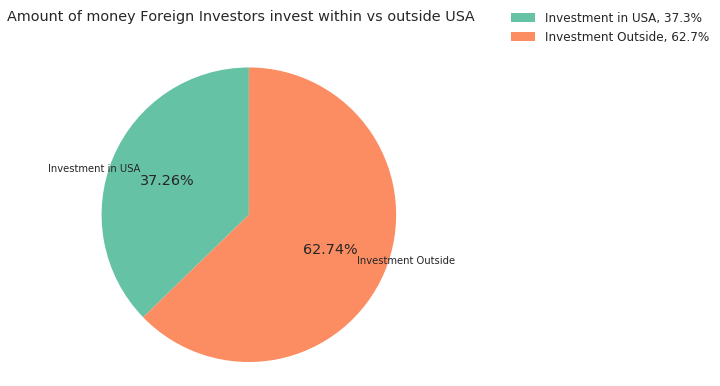

In [72]:
nonamerican_investors=investments[(~(investments['investor_country_code']=='USA'))&(investments['funding_year']==2014)]
#check the proportion of them investing in america
usa_investments=nonamerican_investors[nonamerican_investors['company_country_code']=='USA']['raised_amount_usd'].sum()
outside_investments=nonamerican_investors[nonamerican_investors['company_country_code']!='USA']['raised_amount_usd'].sum()
usa_investments*100.0/(outside_investments+usa_investments)
l=['Investment in USA','Investment Outside']
inv=[usa_investments*100.0/(outside_investments+usa_investments),100-usa_investments*100.0/(outside_investments+usa_investments)]
plot_pie_chart(l,inv,'Amount of money Foreign Investors invest within vs outside USA')

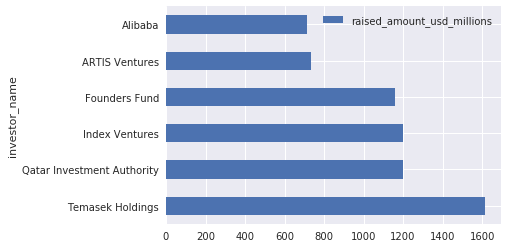

In [79]:
nonamerican_investors[nonamerican_investors['company_country_code']=='USA'][['investor_name','raised_amount_usd_millions']].groupby('investor_name').agg('sum').sort_values('raised_amount_usd_millions',ascending=False).iloc[:6,:].plot.barh()

Leading Foreign investors investing in USA

### Regional distribution of startups within the USA

#### Helper functions for plotting

In [91]:
# country wise percentage of number of startups
# Helper funtion to process the data in terms of state code
def state_data(s,df):
    #assert isinstance(s, basestring)
    #assert isinstance(df, pd.core.frame.DataFrame)
    
    df = df[pd.notnull(df[s])]
    label = list(df[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(df[s]).count(item))
    
    pair = list(zip(label,frequency))
    pair.sort(key=lambda x:x[1], reverse=True)
    #remove sorting as it is not needed
    state=list(range(len(pair)))
    num=list(range(len(pair)))
    for i in range(len(pair)):
        state[i] = pair[i][0]
        num[i] = pair[i][1]
    state_df = pd.DataFrame(
    {'state_code': state,
     'number_startups': num,
    })
    
    return(state_df)
def plot_choropleth(df,plot_title):
        init_notebook_mode(connected=True)
        #companies = companies[companies['founded_year'] == 2014]
        #usa = companies[companies['country_code']=="USA"]
        #df =state_data('state_code',usa)

        scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                    [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

        data = [ dict(
                type='choropleth',
                colorscale = scl,
                autocolorscale = False,
                locations = df['state_code'],
                z = df['number_startups'].astype(float),
                locationmode = 'USA-states',
                marker = dict(
                    line = dict (
                        color = 'rgb(255,255,255)',
                        width = 2
                    ) ),
                colorbar = dict(
                    title = "Number of Startups")
                ) ]

        layout = dict(
                title = plot_title,
                geo = dict(
                    scope='usa',
                    projection=dict( type='albers usa' ),
                    showlakes = True,
                    lakecolor = 'rgb(255, 255, 255)'),
                     )

        fig = dict( data=data, layout=layout )
        plotly.offline.iplot( fig, filename='d3-cloropleth-map' )

In [92]:
df_2014_US=companies[(companies['country_code']=='USA')&(companies['founding_year']==2014)]
plot_choropleth(state_data('state_code',df_2014_US),'2014 US New Startups by State')

In [ ]:
# try to see if a particular region has startups of a particular kind

In [93]:
def particular_category(companies,name,title):
    companies = companies[pd.notnull(companies['country_code'])]
    usa = companies[companies['country_code']=="USA"]
    usa = usa[pd.notnull(usa['category_list'])]
    usa = usa[ (usa['category_list'].str.contains(name, case=False))]
    #ft_af2002 = usa[(usa['founded_year'] > 2002) & (usa['category_list'].str.contains('fintech', case=False))]
    plot_choropleth(state_data('state_code',usa),title)
particular_category(companies,'fintech','Fintech companies')

In [94]:
particular_category(companies,'software','Software companies')

In [96]:
particular_category(companies,'chemicals','Chemical companies')

In [97]:
particular_category(companies,'farming','Farming companies')

In [98]:
particular_category(companies,'Oil & Gas','Oil and Gas companies')

In [99]:
particular_category(companies,'textiles','Textile companies')

In [173]:
particular_category(df,'food processing','Fintech companies')

### Regionwise analysis for investments

In [197]:
temp_investments = investments[(investments['investor_country_code'] == 'USA')&(investments['funding_year']==2014)]
temp_investments = temp_investments[pd.notnull(temp_investments['investor_state_code'])]
plot_choropleth(state_data('investor_state_code',temp_investments),'2014 USA investors location by state')


In [198]:
temp_investments = investments[(investments['investor_country_code'] == 'USA')&(investments['funding_year']==2014)]
temp_investments = temp_investments[pd.notnull(temp_investments['company_state_code'])]
plot_choropleth(state_data('company_state_code',temp_investments),'Investments (by USA investors) in USA in 2014 by State')

### Now let us investigate the investments more:

When ever a company looks for funding it is important to know who would be their ideal investors so that they could approach them, this would depend on the level of maturity of the company etc. Usually we might expect two kinds of patterns in the investors, a few investrs might invest small amounts into a large number of companies hoping at lest a few of them would succeed (the more the number of companies the more the chance of at least one or two of them succeeding), while others might follow the approach of carefully investing large amounts on a few select companies which migth have more probability to succeed i.e. a hight risk and high gain possibility. So we would like to analyze for these trends and then once we see companies following the trend of 
making large number of smaller investments then we could suggest a founder to look for an investor from among this list in cse he is at the starting stage and needs a small amount of funding to begin with, as the company gets more mature a founder/co-founder can taget the investors playing the high risk-high gain strategy. Thus this analysis would be useful for the companies.

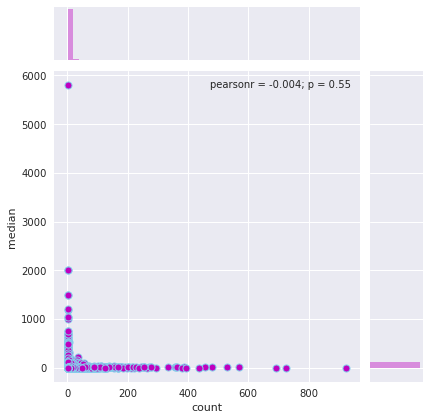

In [104]:
df_investor2d=investments[pd.notnull(investments['raised_amount_usd_millions'])&(pd.notnull(investments['raised_amount_usd_millions']))&(investments['funding_year']>=2010)]
df_investor2d=df_investor2d[['investor_name','raised_amount_usd_millions']].groupby(['investor_name']).agg(['count','median'])
sns.jointplot(x=df_investor2d['raised_amount_usd_millions']['count'], y=df_investor2d['raised_amount_usd_millions']['median'], kind='scatter',\
              color='m', edgecolor="skyblue", linewidth=1,s=50)

As we can see _there are some investors_ following the two trends we expected i.e those who make many small investments (towards the bottom right) and those who make only a few but high investments (top left). So we can use this analysis for recommending the appropriate investors to the startups! NOw let us analyze further and look more carefully into these two kinds of investors and see if we can extract any more patterns.
__let us look at investors which have invested in more than 200 comapnies__

In [113]:
df_investor2d[df_investor2d['raised_amount_usd_millions']['count']>200].sort_values([('raised_amount_usd_millions', 'count')], ascending=False).iloc[:10,:]

raised_amount_usd_millions           
                                                      count     median
investor_name                                                         
Wayra                                                   923   0.063228
Start-Up Chile                                          724   0.040000
500 Startups                                            693   1.000000
Sequoia Capital                                         570  15.745188
New Enterprise Associates                               531  15.000000
Accel                                                   479  12.600000
Kleiner Perkins Caufield & Byers                        457  20.000000
SV Angel                                                438   2.142500
Y Combinator                                            394   0.500000
Andreessen Horowitz                                     386  10.375000

Thus the above are the startups which invest small amounts into many companies, it is quite expected to see names like __Y Combinator__ and __500 Startups__ to make this list, they are quite well known investors and also they onvest small amounts into lot of companies, so the results are as expected and also useful as we can suggest the companies other investors in this group as well! __Now let us go another step deeper and analyze oneof these investors more__ we chose __Y Combinator__ and the reson behind choosing it is just because it is a company we heard a lot about and we were curious.

In [117]:
df_ycomb=investments[pd.notnull(investments['investor_name'])&pd.notnull(investments['funding_round_type'])&(investments['funding_year']>=2010)]
df_ycomb=df_ycomb[df_ycomb['investor_name'].str.contains('y combinator',False)]
print('number of investments made by Y Combinator after 2010-2015 = ',df_ycomb.shape[0])

number of investments made by Y Combinator =  690


In [119]:
print('The various funding round types are ',df_ycomb['funding_round_type'].unique())

The various funding round types are  ['seed' 'venture' 'convertible_note' 'undisclosed' 'product_crowdfunding'
 'angel' 'debt_financing']


Although the number of companies is 394 we can see the total funding are almost double (this is probably because Y Combinator invests a small amount twice in a company)<br>
__Now let us see the types of investments made by Y combinator__.
We will look specifically at the 'funding_round_type' which is 'seed', 'venture', 'convertible_note', 'undisclosed','product_crowdfunding', 'angel' and 'debt_financing'.

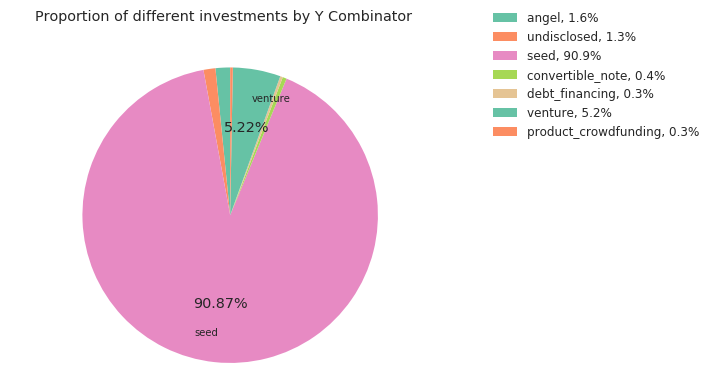

In [131]:
funding_typewise={}
total=df_ycomb.shape[0]
for fund in df_ycomb['funding_round_type'].unique():
    funding_typewise[fund]=funding_typewise.get(fund,0)+df_ycomb[df_ycomb['funding_round_type']==fund].shape[0]/total
plot_pie_chart(list(funding_typewise.keys()),list(funding_typewise.values()),'Proportion of different investments by Y Combinator')

Thus we can see that most of it __(almost 91%) is seed__ which is the funding given to a company at its inception it is usually small amount and this is what __we would expect for Y Combinator or any other investor which invests small amounts into many companies.__

### Regionwise investments of Y Combinator

In [135]:
plot_choropleth(state_data('company_state_code',df_ycomb),'Regionwise investments of Y Combinator 2010-2015')

In [143]:
df_ycomb=df_ycomb[pd.notnull(df_ycomb['company_category_list'])]

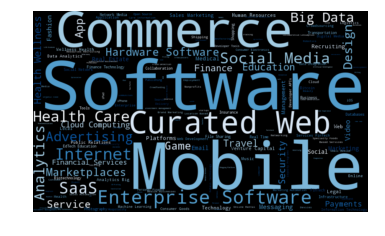

In [189]:
flat_list = [category+' ' for sublist in df_ycomb['company_category_list'].apply(lambda x:x.split('|')).tolist() for category in sublist]
wordcloud = WordCloud(width=800, height=480, margin=0,colormap="Blues").generate(''.join(flat_list))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Now let us look at the investors which invest large amounts in small number of companies

In [176]:
df_investor2d=investments[pd.notnull(investments['raised_amount_usd_millions'])&(pd.notnull(investments['raised_amount_usd_millions']))&(investments['funding_year']>=2010)]
df_investor2d=df_investor2d[['investor_name','raised_amount_usd_millions']].groupby(['investor_name']).agg(['count','median'])
df_investor2d[(df_investor2d['raised_amount_usd_millions']['median']>50)&(df_investor2d['raised_amount_usd_millions']['count']>15)].sort_values([('raised_amount_usd_millions', 'count')]).iloc[:5,:]

raised_amount_usd_millions       
                                              count median
investor_name                                             
Jennison Associates                              16   65.0
Adage Capital Management                         17   55.0
Valiant Capital Partners                         17   80.0
Coatue Management                                17  100.0
Brookside Capital                                18   63.0

So these are the investors who invest in a few companies but invest substanitial amounts, now let us go another step deeper and analyze one of these investors more, we chose __Adage Capital management__ and there is no special reson behind choosing it.

In [178]:
df_adage=investments[pd.notnull(investments['investor_name'])&pd.notnull(investments['funding_round_type'])&(investments['funding_year']>=2010)]
df_adage=df_adage[df_adage['investor_name']=='Adage Capital Management']
print('number of investments made by Adage Combinator after 2010-2015 = ',df_adage.shape[0])

number of investments made by Adage Combinator after 2010-2015 =  17


As expected it has 17 investments

In [179]:
print('The various funding round types are ',df_adage['funding_round_type'].unique())

The various funding round types are  ['venture' 'private_equity']


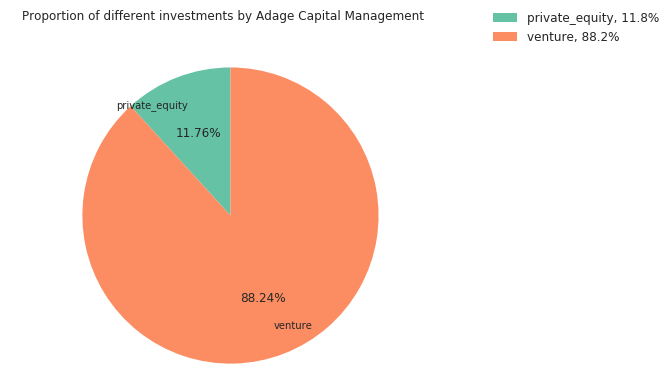

In [182]:
funding_typewise={}
total=df_adage.shape[0]
for fund in df_adage['funding_round_type'].unique():
    funding_typewise[fund]=funding_typewise.get(fund,0)+df_adage[df_adage['funding_round_type']==fund].shape[0]/total
plot_pie_chart(list(funding_typewise.keys()),list(funding_typewise.values()),'Proportion of different investments by Adage Capital Management')

In [183]:
plot_choropleth(state_data('company_state_code',df_adage),'Regionwise investments of Adage Capital Management 2010-2015')

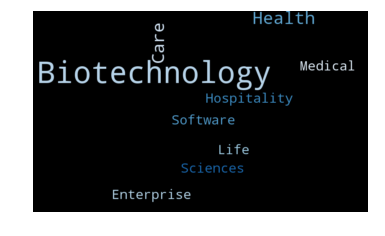

In [194]:
df_adage=df_adage[pd.notnull(df_adage['company_category_list'])]
l=df_adage['company_category_list'].apply(lambda x:x.split('|')).tolist()
l=l[:1]+l[2:]#removing noisy data after manual inspection
flat_list = [category+' ' for sublist in l for category in sublist]
wordcloud = WordCloud(width=800, height=480, margin=0,colormap="Blues").generate(''.join(flat_list))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

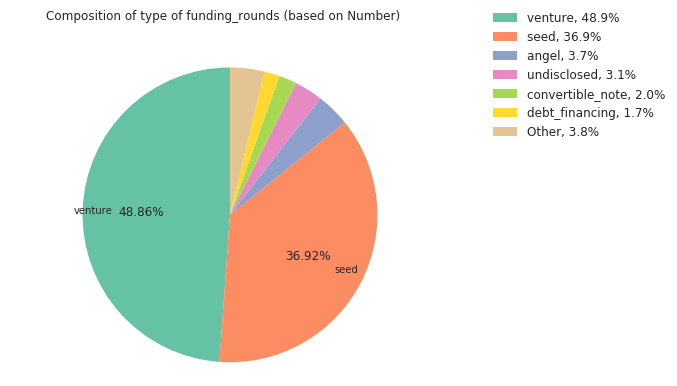

In [201]:
pair=get_pie_data('funding_round_type',investments[investments['funding_year']==2014])
plot_pie_chart(list(zip(*pair))[0],list(zip(*pair))[1],'Composition of type of funding_rounds (based on Number)')

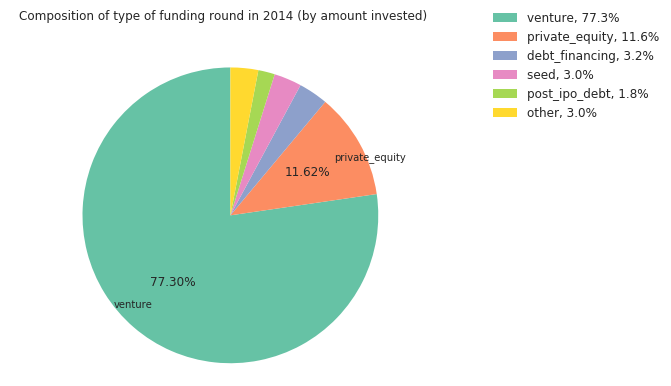

In [203]:
temp_investments=investments[(pd.notnull(investments['raised_amount_usd'])) & (investments['funding_year']==2014) ]
country_investment=temp_investments[['raised_amount_usd','funding_round_type']].groupby('funding_round_type').agg('sum')
countries=list(country_investment.index)
investment=country_investment['raised_amount_usd'].tolist()
ci_tuple=list(zip(countries,investment))
ci_tuple.sort(key= lambda x:x[1],reverse=True)
c,i=zip(*ci_tuple)
c=list(c)
i=list(i)
other_i=sum(i[5:])
c=c[:5]+['other']
i=i[:5]+[other_i]
plot_pie_chart(c,i,'Composition of type of funding round in 2014 (by amount invested)')

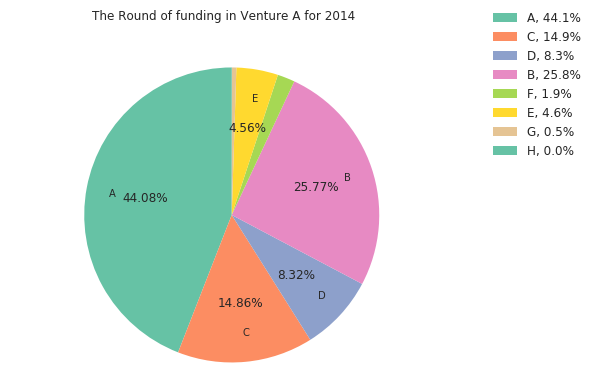

In [250]:
temp_investments = investments[(investments['funding_round_type'] == 'venture')& (investments['funding_year'] == 2014)&(investments['company_country_code'] == 'USA')]
temp_investments = temp_investments[pd.notnull(temp_investments['funding_round_code'])]
label = list(temp_investments['funding_round_code'].unique())
size = []
for item in label:
    size.append(list(temp_investments['funding_round_code']).count(item))
    
plot_pie_chart(label, size, 'The number of round types of funding in Venture A for 2014')

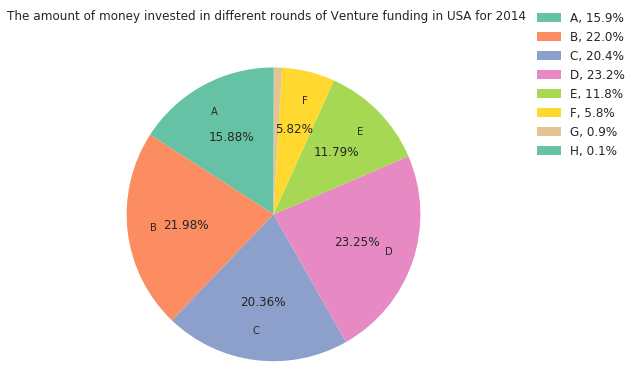

In [252]:
df = temp_investments['raised_amount_usd'].groupby(temp_investments['funding_round_code']).agg('sum')
label = list(df.index)
size = df.tolist()
plot_pie_chart(label, size, 'The amount of money invested in different rounds of Venture funding in USA for 2014')

### Now we focus on Successful vs Unsuccessful startups and analyze if we can find any differences

### Does the time/month when the company was started has any affect on its success?

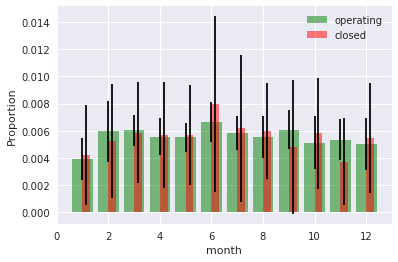

In [268]:
def monthly_analysis(year_lis):
    temp1=[]
    temp2=[]
    for year in year_lis:
        dfnew_s=companies[(companies['founding_year']==year) &(companies['country_code']=='USA')&(companies['status']=='operating')]
        dfnew_f=companies[(companies['founding_year']==year) &(companies['country_code']=='USA')&(companies['status']=='closed')]

        monthly_count_s=[]
        monthly_count_f=[]
        for month in range(1,13):
            monthly_count_s.append(sum(dfnew_s['founding_month']==month))
            monthly_count_f.append(sum(dfnew_f['founding_month']==month))
        temp1.append([x/sum(monthly_count_s) for x in monthly_count_s])
        temp2.append([x/sum(monthly_count_f) for x in monthly_count_f])
    temp1=np.array(temp1)/len(year_lis)
    temp2=np.array(temp2)/len(year_lis)
    mean1=np.mean(temp1,axis=0)
    std1=np.std(temp1,axis=0)
    mean2=np.mean(temp2,axis=0)
    std2=np.std(temp2,axis=0)
    fig, ax = plt.subplots()
    ax.bar(range(1,13), mean1, yerr=std1,ecolor='black',color='green',align='center',label='operating', alpha=0.5,capsize=10)
    ax.bar(range(1,13), mean2, yerr=std2,ecolor='black',width=0.3,color='red',align='edge',label='closed', alpha=0.5,capsize=10)
    ax.set_ylabel('Proportion')
    plt.legend(loc='upper right')
    ax.set_xlabel('month')
    plt.show()
companies=companies[~((companies['founding_day']==1)&(companies['founding_month']==1))]
monthly_analysis(range(2000,2015))

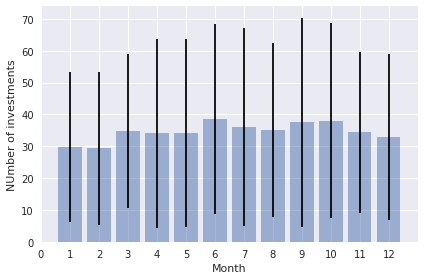

In [233]:
def monthly_analysis(year_lis):
    temp=[]
    for year in year_lis:
        dfnew=investments[(investments['funding_year']==year) & (investments['company_country_code']=='USA')]  
        monthly_count=[]
        for month in range(1,13):
            monthly_count.append(sum(dfnew['funding_month']==month))
        temp.append(monthly_count)
    temp=np.array(temp)/len(year_lis)
    mean=np.mean(temp,axis=0)
    std=np.std(temp,axis=0)
    fig, ax = plt.subplots()
    ax.bar(range(1,13), mean, yerr=std,ecolor='black',align='center', alpha=0.5,capsize=50)
    ax.set_ylabel('NUmber of investments')
    ax.set_xticks(range(13))
    ax.set_xlabel('Month')
    plt.tight_layout()
    plt.show()
investments=investments[~((investments['funding_day']==1)&(investments['funding_month']==1))]
monthly_analysis(range(2000,2015))

### Do Number of funding rounds make a difference?

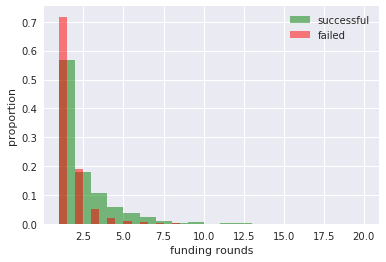

In [270]:
s_fr=companies[(companies['status']=='operating')& (companies['founding_year']<2011)&(companies['founding_year']>2004)]['funding_rounds'].tolist()
f_fr=companies[(companies['status']=='closed')& (companies['founding_year']<2011)&(companies['founding_year']>2004)]['funding_rounds'].tolist()
bins = np.linspace(1, 20, 20)
plt.hist(s_fr, bins, alpha=0.5, label='successful',color='green', normed=True)
plt.hist(f_fr, bins, alpha=0.5,width=0.5,color='red', label='failed', normed=True)
plt.legend(loc='upper right')
plt.xlabel('funding rounds')
plt.ylabel('proportion')
plt.show()

### Does the total amount of funding make a difference?

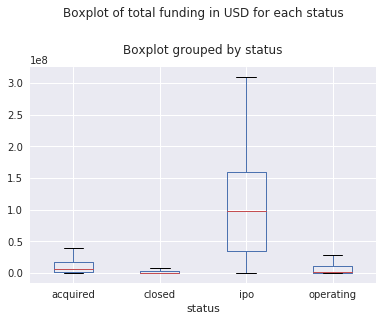

In [298]:
rcParams['axes.titlepad'] = 50
temp_companies.boxplot(column='funding_total_usd',by='status',showfliers=False)
plt.title("Boxplot of total funding in USD for each status")

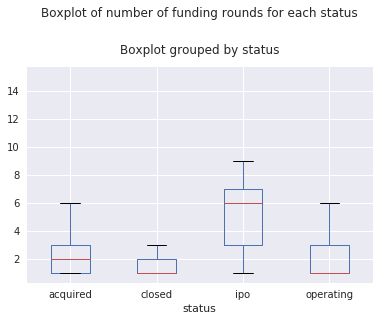

In [303]:
rcParams['axes.titlepad'] = 50
temp_companies.boxplot(column='funding_rounds',by='status')
plt.title("Boxplot of number of funding rounds for each status")

### What is the optimal amount of time in months between starting a company and to get first funding?

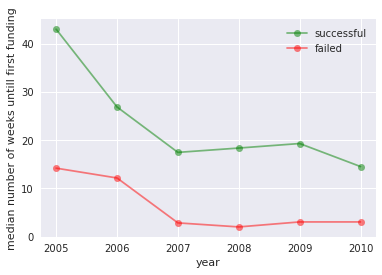

In [279]:
temp_companies=companies[(pd.notnull(companies['status']))&(companies['country_code']=='USA')&(companies['founding_year']>=2005)&(companies['founding_year']<=2010)]
temp_s=[]
temp_f=[]
for year in range(2005,2011):
    df_years=temp_companies[(temp_companies['founding_year']==year)&(temp_companies['status']=='operating')]
    temp_s.append(df_years['difference'].median())
    df_yearf=temp_companies[(temp_companies['founding_year']==year)&(temp_companies['status']=='closed')]
    temp_f.append(df_yearf['difference'].median())
plt.plot(range(2005,2011),temp_s, alpha=0.5, label='successful',color='green',marker='o')
plt.plot(range(2005,2011),temp_f, alpha=0.5,color='red', label='failed',marker='o')
plt.legend(loc='upper right')
plt.xlabel('year')
plt.ylabel('median number of weeks untill first funding')
plt.show()

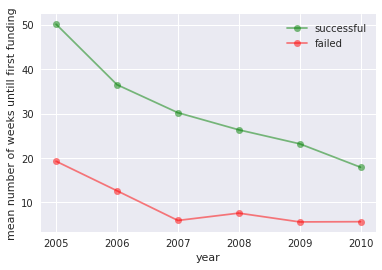

In [280]:
temp_companies=companies[(pd.notnull(companies['status']))&(companies['country_code']=='USA')&(companies['founding_year']>=2005)&(companies['founding_year']<=2010)]
temp_s=[]
temp_f=[]
for year in range(2005,2011):
    df_years=temp_companies[(temp_companies['founding_year']==year)&(temp_companies['status']=='operating')]
    temp_s.append(df_years['difference'].mean())
    df_yearf=temp_companies[(temp_companies['founding_year']==year)&(temp_companies['status']=='closed')]
    temp_f.append(df_yearf['difference'].mean())
plt.plot(range(2005,2011),temp_s, alpha=0.5, label='successful',color='green',marker='o')
plt.plot(range(2005,2011),temp_f, alpha=0.5,color='red', label='failed',marker='o')
plt.legend(loc='upper right')
plt.xlabel('year')
plt.ylabel('mean number of weeks untill first funding')
plt.show()

### Box plots for 'the duration in months between establishing and first funding' all the different types of statuses

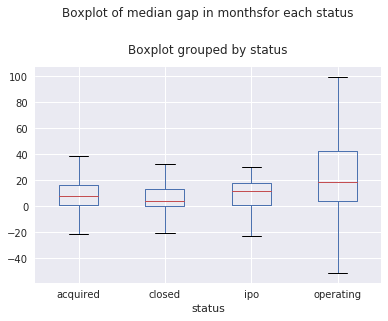

In [288]:
rcParams['axes.titlepad'] = 50
temp_companies.boxplot(column='difference',by='status',showfliers=False)
plt.title("Boxplot of median gap in months for each status")

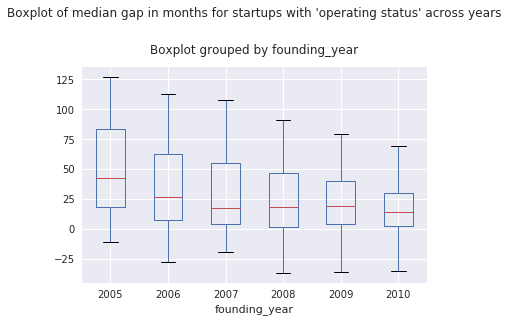

In [304]:
rcParams['axes.titlepad'] = 50
temp_companies[temp_companies['status']=='operating'].boxplot(column='difference',by='founding_year',showfliers=False)
plt.title("Boxplot of median gap in months for startups with 'operating status' across years")

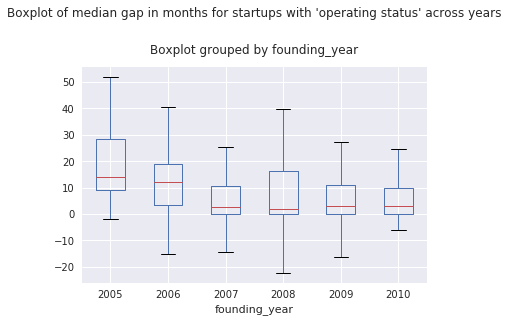

In [305]:
rcParams['axes.titlepad'] = 50
temp_companies[temp_companies['status']=='closed'].boxplot(column='difference',by='founding_year',showfliers=False)
plt.title("Boxplot of median gap in months for startups with 'operating status' across years")

In [335]:
combined=pd.read_csv('ece143/project/combined.csv')

In [336]:
combined.head(5)

,name,status,funding_rounds,days_between_first_last_funding,days_between_founded_first_funding
0,:Qounter,success,2,"227 days, 0:00:00","227 days, 0:00:00"
1,0-6.com,success,1,0:00:00,0:00:00
2,004 Technologies,success,1,0:00:00,0:00:00
3,Ondine Biomedical Inc.,success,2,"101 days, 0:00:00","101 days, 0:00:00"
4,H2O.ai,success,4,"1040 days, 0:00:00","1040 days, 0:00:00"


In [375]:
investments=pd.read_csv('ece143/project/investments.csv')

In [376]:
investments=investments[(pd.notnull(investments['funded_at']))]
investments['funded_at']=investments['funded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
investments['funded_at_date']=investments['funded_at'].apply(lambda x:x.date())

In [377]:
investments.head(20)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,funded_at_date
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,2008-03-19
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN,2014-07-24
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0,2014-07-01
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,2015-11-09
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0,2013-05-22
5,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,2015-11-09
6,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,2013-01-03,1700000.0,2013-01-03
7,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,8900000.0,2014-07-19
8,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/paxion-capital-partners,Paxion Capital Partners,NaN,NaN,NaN,NaN,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,2015-11-09
9,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/transamerica,Transamerica,USA,IA,Cedar Rapids,Cedar Rapids,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0,2015-11-09


In [394]:
investment_round_wise=investments[['company_name','funded_at_date']].groupby('company_name').aggregate(lambda x:sorted(list(set(x)),reverse=0))

In [395]:
company=list(investment_round_wise.index)
funding_rounds=investment_round_wise['funded_at_date'].tolist()

In [396]:
funding_rounds_df = pd.DataFrame(
    {'name': company,
     'rounds': funding_rounds
    })

In [397]:
funding_rounds_df.head(10)

,name,rounds
0,"#BratPackStyle, LLC.",[2015-06-01]
1,#waywire,[2012-06-30]
2,'Rock' Your Paper,"[2012-08-09, 2013-12-01]"
3,( caravelo (,[2012-01-01]
4,.,[2015-01-15]
5,.FOX Networks,[2007-01-16]
6,.comDominio,[2004-02-12]
7,//Staq.io,[2012-10-01]
8,0-6.com,[2008-03-19]
9,004 Technologies,[2014-07-24]


In [384]:
companies=pd.read_csv('ece143/project/companies.csv')

In [385]:
companies=companies[pd.notnull(companies['founded_at'])]
companies['founded_at']=companies['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
companies['founded_at_date']=companies['founded_at'].apply(lambda x:x.date())

In [392]:
companies_short=companies[['name','status','founded_at_date']]

In [429]:
merged=pd.merge(companies_short, funding_rounds_df, on='name', how='inner')

In [430]:
merged['number_rounds']=merged['rounds'].apply(lambda x:len(x))

In [431]:
merged.head(5)

,name,status,founded_at_date,rounds,number_rounds
0,0-6.com,operating,2007-01-01,[2008-03-19],1
1,004 Technologies,operating,2010-01-01,[2014-07-24],1
2,H2O.ai,operating,2011-01-01,"[2013-01-03, 2013-05-22, 2014-07-19, 2015-11-09]",4
3,One Inc.,operating,2011-08-01,"[2011-07-20, 2013-02-05, 2014-02-05]",3
4,"1,2,3 Listo",operating,2012-01-01,[2013-02-18],1


In [432]:
merged['number_rounds'].unique()

array([ 1,  4,  3,  2,  6,  5,  8,  7,  9, 13, 11, 10, 14, 12, 16, 15])

In [433]:
merged['founded_at_date']=merged['founded_at_date'].apply(lambda x:[x])

In [434]:
merged['rounds0']=merged['founded_at_date']+merged['rounds']

In [435]:
def gaps(x):
    temp=[]
    for i in range(1,len(x)):
        temp.append((x[i]-x[i-1]).days/30)
    return temp

In [436]:
merged['gaps']=merged['rounds0'].apply(lambda x:gaps(x))

In [437]:
merged['founded_at_date']=merged['founded_at_date'].apply(lambda x:x[0])

In [438]:
merged['founding_year']=merged['founded_at_date'].apply(lambda x:x.year)

In [439]:
trimmed_merged=merged[(merged['founding_year']>2004)&(merged['founding_year']<2011)]

In [440]:
sorted(trimmed_merged['number_rounds'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [441]:
temp_df=trimmed_merged[trimmed_merged['number_rounds']==13]

In [442]:
i

1

In [443]:
temp_df=trimmed_merged[trimmed_merged['number_rounds']==i+1]

In [444]:
temp_df

,name,status,founded_at_date,rounds,number_rounds,rounds0,gaps,founding_year
11,1000memories,acquired,2010-07-01,"[2010-01-01, 2011-02-16]",2,"[2010-07-01, 2010-01-01, 2011-02-16]","[-6.033333333333333, 13.7]",2010
38,140 Proof,operating,2010-01-11,"[2009-07-01, 2011-04-28]",2,"[2010-01-11, 2009-07-01, 2011-04-28]","[-6.466666666666667, 22.2]",2010
48,19pay,operating,2005-01-01,"[2006-01-01, 2010-01-01]",2,"[2005-01-01, 2006-01-01, 2010-01-01]","[12.166666666666666, 48.7]",2005
77,20x200,operating,2007-09-01,"[2009-10-01, 2010-08-01]",2,"[2007-09-01, 2009-10-01, 2010-08-01]","[25.366666666666667, 10.133333333333333]",2007
108,2nd Watch,operating,2010-01-01,"[2013-11-05, 2014-10-14]",2,"[2010-01-01, 2013-11-05, 2014-10-14]","[46.8, 11.433333333333334]",2010
129,365Scores,operating,2008-01-01,"[2013-01-28, 2014-09-29]",2,"[2008-01-01, 2013-01-28, 2014-09-29]","[61.8, 20.3]",2008
154,3DSoC,operating,2006-06-01,"[2007-12-01, 2010-08-01]",2,"[2006-06-01, 2007-12-01, 2010-08-01]","[18.266666666666666, 32.46666666666667]",2006
156,3G Multimedia,operating,2009-09-15,"[2011-01-01, 2012-07-01]",2,"[2009-09-15, 2011-01-01, 2012-07-01]","[15.766666666666667, 18.233333333333334]",2009
159,3GV8 International Inc,operating,2005-07-01,"[2006-03-01, 2007-02-01]",2,"[2005-07-01, 2006-03-01, 2007-02-01]","[8.1, 11.233333333333333]",2005
166,3Pillar Global,operating,2006-08-01,"[2011-06-09, 2013-06-06]",2,"[2006-08-01, 2011-06-09, 2013-06-06]","[59.1, 24.266666666666666]",2006


In [464]:
rounds_operating=[]
for i in range(len(trimmed_merged['number_rounds'].unique())):
    temp_df=trimmed_merged[(trimmed_merged['number_rounds']==i+1)&(trimmed_merged['status']=='operating')]
    temp_list=temp_df['gaps'].apply(lambda x:x[i]).tolist()
    rounds_operating.append(temp_list)

In [465]:
rounds_closed=[]
for i in range(len(trimmed_merged['number_rounds'].unique())):
    temp_df=trimmed_merged[(trimmed_merged['number_rounds']==i+1)&(trimmed_merged['status']=='closed')]
    temp_list=temp_df['gaps'].apply(lambda x:x[i]).tolist()
    rounds_closed.append(temp_list)

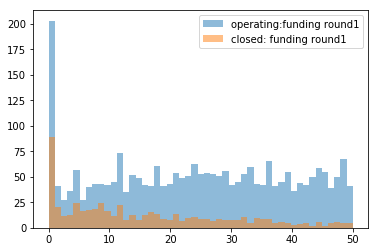

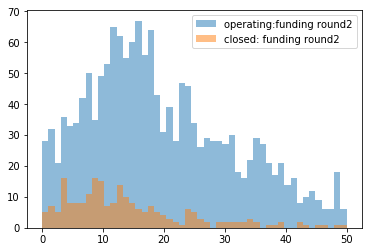

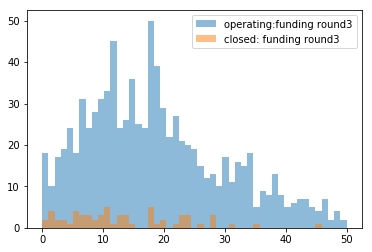

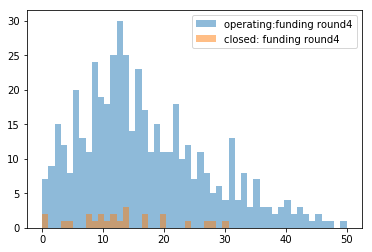

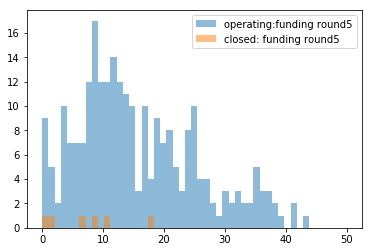

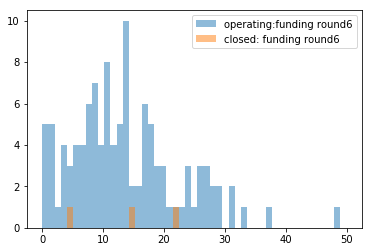

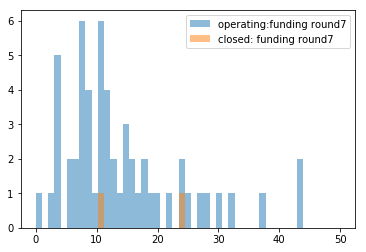

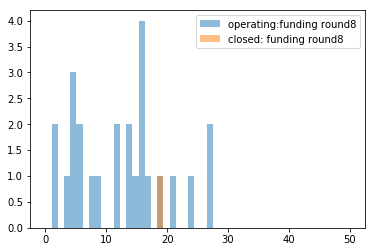

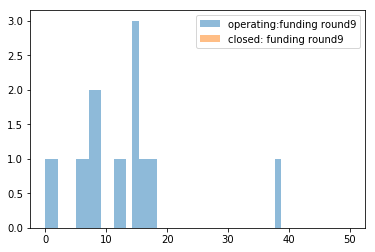

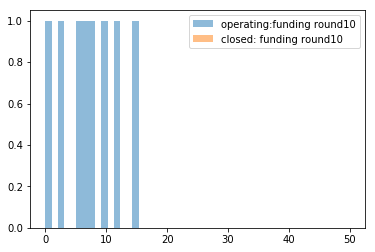

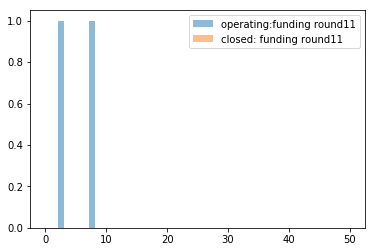

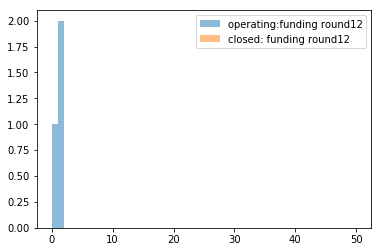

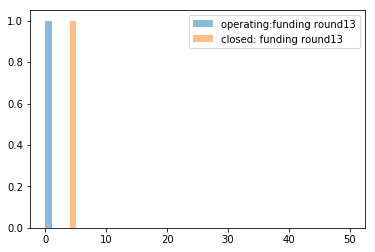

In [466]:


bins = numpy.linspace(0, 50, 50)

for i in range(13):
#     c1=len(rounds_operating[i])
#     c2=len(rounds_closed[i])
#     rounds_operating[i]=(1.0/(c1+c2))*np.array(rounds_operating[i])
#     rounds_closed[i]=(1.0/(c1+c2))*np.array(rounds_closed[i])
    plt.hist(rounds_operating[i], bins, alpha=0.5, label='operating:funding round'+str(i+1), normed=0)
    plt.hist(rounds_closed[i], bins, alpha=0.5, label='closed: funding round'+str(i+1), normed=0) 
    plt.legend(loc='upper right')
    plt.show()

